In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation = 'relu')(input_img)

decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [14]:
from tensorflow.keras.datasets import mnist
import numpy as np
(X_train, _),(x_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(X_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoded_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoded_layer(encoded_input))
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()
autoencoder.fit(X_train, X_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test, x_test))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 3s 4ms/step - loss: 0.2773 - val_loss: 0.1914
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1712 - val_loss: 0.1533
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1440 - val_loss: 0.1338
Epoch 4/50
235/235 

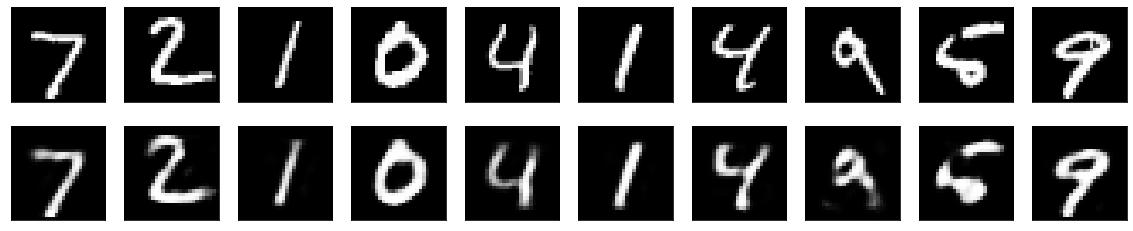

In [16]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
encoded = Dense(128, activation = 'relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)

decoded = Dense(64, activation = 'relu')(encoded)
decoded = Dense(128, activation = 'relu')(decoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()
autoencoder.fit(X_train, X_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test, x_test))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

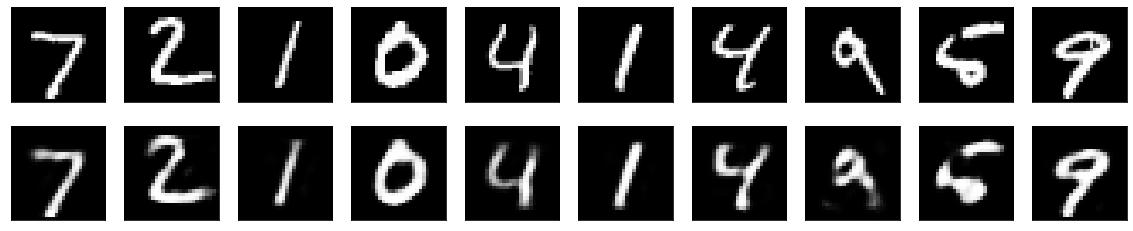

In [18]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

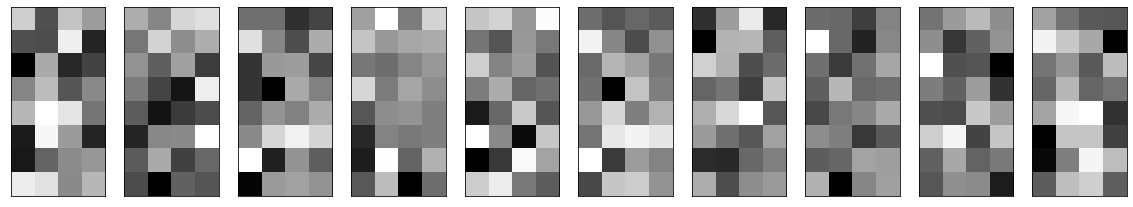

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(encoded_imgs[i].reshape(4, 8).T)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape = (28, 28, 1))

x = Conv2D(16, (3, 3), activation ='relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(8, (3, 3), activation ='relu', padding = 'same')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(8, (3, 3), activation ='relu', padding = 'same')(x)
encoded = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(8, (3, 3), activation ='relu', padding = 'same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation ='relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation ='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation ='sigmoid', padding = 'same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()

(X_train, _),(x_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 8)           584 

In [21]:
autoencoder.fit(X_train, X_train,
                epochs = 50,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test, x_test))

Epoch 1/50
469/469 [==============================] - 11s 8ms/step - loss: 0.2126 - val_loss: 0.1444
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1350 - val_loss: 0.1267
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1236 - val_loss: 0.1190
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1177 - val_loss: 0.1141
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1138 - val_loss: 0.1110
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1109 - val_loss: 0.1083
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1083 - val_loss: 0.1056
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1062 - val_loss: 0.1043
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1042 - val_loss: 0.1020
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1027 - val_loss: 0.100

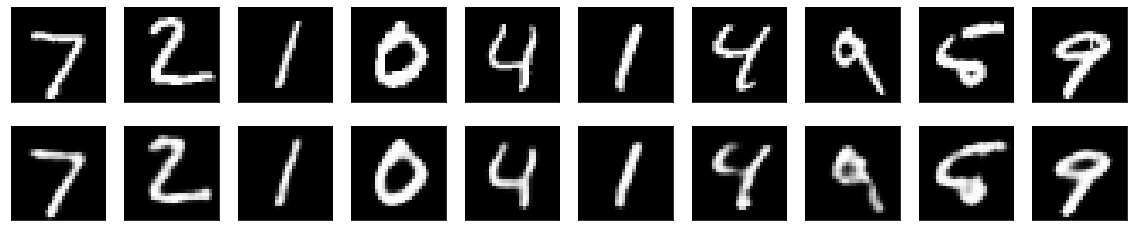

In [22]:
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [44]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3, 3), activation ='relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3, 3), activation ='relu', padding = 'same')(x)
encoded = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(32, (3, 3), activation ='relu', padding = 'same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation ='relu', padding = 'same')(x)
decoded = Conv2D(1, (3, 3), activation ='sigmoid', padding = 'same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

(X_train, _),(x_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

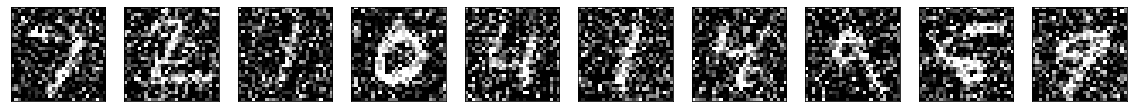

In [43]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
X_train_noisy.shape

(60000, 28, 28, 1)

In [47]:
autoencoder.fit(X_train_noisy, X_train,
                epochs = 100,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test_noisy, x_test))

Epoch 1/100


ValueError: ignored

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()